In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
# Creating the dataset
np.random.seed(0)
num_customers = 200

# Generate random data for annual spending on different categories
electronics_spending = np.random.randint(100, 2000, num_customers)
clothing_spending = np.random.randint(50, 1500, num_customers)
groceries_spending = np.random.randint(100, 3000, num_customers)
furniture_spending = np.random.randint(100, 2500, num_customers)
toys_spending = np.random.randint(10, 500, num_customers)

# Create a DataFrame
data = pd.DataFrame({
    'Electronics': electronics_spending,
    'Clothing': clothing_spending,
    'Groceries': groceries_spending,
    'Furniture': furniture_spending,
    'Toys': toys_spending
})




In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(scaled_data)

data['Cluster'] = kmeans.labels_

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
data['PCA1'] = principal_components[:, 0]
data['PCA2'] = principal_components[:, 1]



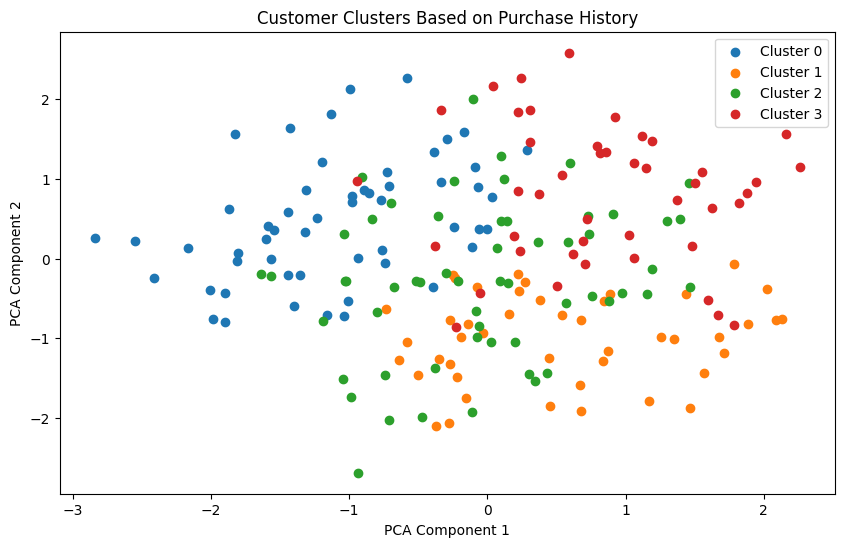

In [8]:
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    cluster_data = data[data['Cluster'] == i]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {i}')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Clusters Based on Purchase History')
plt.legend()
plt.show()